In [1]:
import numpy as np

def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits))
    return exp_logits / exp_logits.sum()

logits = np.array([2.0, 1.0, 0.1])
probabilities = softmax(logits)
print("Probabilities", probabilities)


Probabilities [0.65900114 0.24243297 0.09856589]


The softmax function is a mathematical function commonly used in machine learning, particularly in the context of classification problems. It takes an array of raw scores, known as logits, and transforms them into normalized probabilities. These probabilities are arranged such that they sum to 1, making them interpretable as the likelihoods of various outcomes.

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Mock water quality data: [pH, Turbidity, Chlorine Level]
X = np.array([
    [7, 5, 0.5],  # Safe
    [8, 7, 0.8],  # Safe
    [5, 10, 1.0], # Unsafe
    [6, 15, 1.5], # Unsafe
    # Add more data
])

# Labels: 1 for Safe, 0 for Unsafe
y = np.array([1, 1, 0, 0])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [3]:
# Create the model
clf = RandomForestClassifier()

# Train the model
clf.fit(X_train, y_train)


RandomForestClassifier()

In [4]:
# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")


Model Accuracy: 1.0


In [5]:
# New data: [pH, Turbidity, Chlorine Level]
new_data = np.array([[7.5, 6, 0.6], [5.5, 12, 1.2]])

# Classify water quality
new_pred = clf.predict(new_data)

# Interpret the output
interpretation = ["Unsafe" if pred == 0 else "Safe" for pred in new_pred]
print(f"Water quality for new data: {interpretation}")


Water quality for new data: ['Safe', 'Unsafe']


In [6]:
# New water quality samples: [pH, Turbidity, Chlorine Level]
new_samples = np.array([
    [7.2, 6, 0.7],  # Sample 1
    [5.8, 11, 1.1]  # Sample 2
])

# Use the trained model to predict the water quality of the new samples
predicted_labels = clf.predict(new_samples)

# Interpret the predicted labels to display as "Safe" or "Unsafe"
predicted_interpretation = ["Safe" if label == 1 else "Unsafe" for label in predicted_labels]

print(f"Predicted water quality for new samples: {predicted_interpretation}")


Predicted water quality for new samples: ['Safe', 'Unsafe']


In [7]:
import matplotlib.pyplot as plt


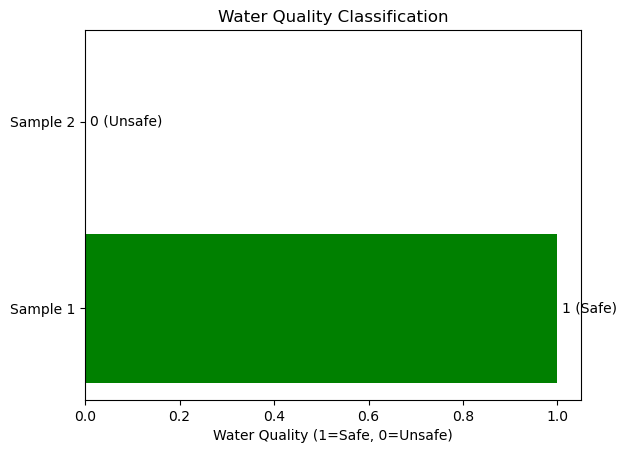

In [10]:
# Sample IDs for new data points
sample_ids = ['Sample 1', 'Sample 2']

# Classification results converted to numerical values
classification_numeric = [1 if label == 'Safe' else 0 for label in predicted_interpretation]

# Set figure and axis for the horizontal bar chart
fig, ax = plt.subplots()

# Create horizontal bar chart
bars = ax.barh(sample_ids, classification_numeric, color=['g' if label == 'Safe' else 'r' for label in predicted_interpretation])

# Label with actual numerical values
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 0.01, i, f"{classification_numeric[i]} ({predicted_interpretation[i]})", va='center')

# Label chart elements
ax.set_xlabel('Water Quality (1=Safe, 0=Unsafe)')
ax.set_title('Water Quality Classification')

# Show the chart
plt.show()


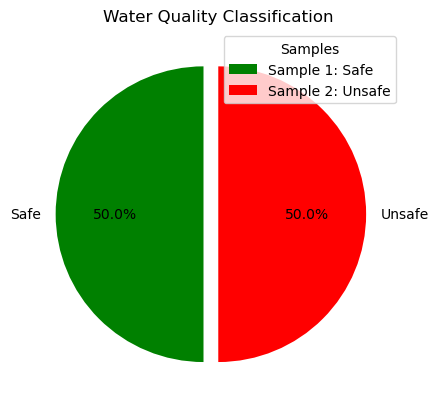

In [11]:
# Sample IDs for new data points
sample_ids = ['Sample 1', 'Sample 2']

# Labels and counts for each category
labels = ['Safe', 'Unsafe']
counts = [predicted_interpretation.count('Safe'), predicted_interpretation.count('Unsafe')]

# Colors for each category
colors = ['green', 'red']

# Explode parameter to slightly separate the slices
explode = (0.1, 0) if counts[0] > 0 and counts[1] > 0 else (0, 0)

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)

# Add title
ax.set_title('Water Quality Classification')

# Add legend with sample details
legend_labels = [f"{sample_ids[i]}: {predicted_interpretation[i]}" for i in range(len(sample_ids))]
ax.legend(legend_labels, title="Samples", loc="best")

# Show the pie chart
plt.show()


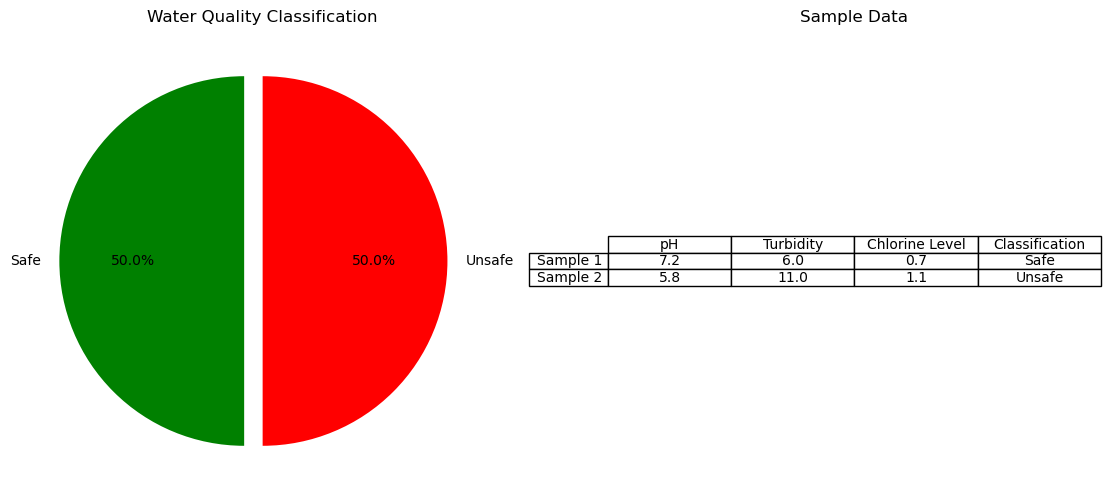

In [12]:
import pandas as pd

# Sample IDs for new data points
sample_ids = ['Sample 1', 'Sample 2']

# Data for new samples
new_samples_df = pd.DataFrame(new_samples, columns=['pH', 'Turbidity', 'Chlorine Level'], index=sample_ids)
new_samples_df['Classification'] = predicted_interpretation

# Labels and counts for each category in the pie chart
labels = ['Safe', 'Unsafe']
counts = [predicted_interpretation.count('Safe'), predicted_interpretation.count('Unsafe')]

# Colors for each category
colors = ['green', 'red']

# Explode parameter to slightly separate the slices
explode = (0.1, 0) if counts[0] > 0 and counts[1] > 0 else (0, 0)

# Create the pie chart and table
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart
ax1.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
ax1.set_title('Water Quality Classification')

# Table
ax2.axis('tight')
ax2.axis('off')
ax2.table(cellText=new_samples_df.values, colLabels=new_samples_df.columns, rowLabels=new_samples_df.index, cellLoc='center', loc='center')
ax2.set_title('Sample Data')

# Show the chart and table
plt.show()
